In [1]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [2]:
%cd /content/mydrive/'My Drive'/20200307_python

/content/mydrive/My Drive/20200307_python


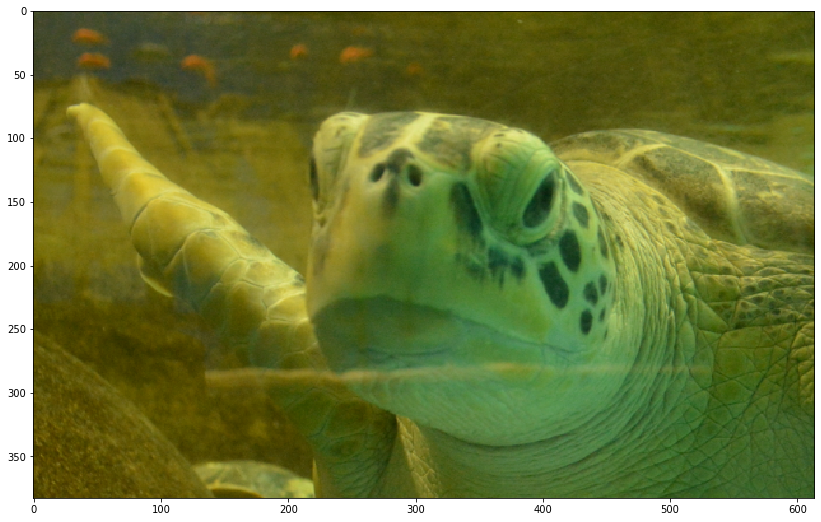

In [3]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

with Image.open('002.png') as img:
  fig = plt.figure(figsize=(14,14))
  ax = fig.gca()
  ax.imshow(img)


In [0]:
img1 = img.filter(ImageFilter.EMBOSS())
img2 = img.filter(ImageFilter.CONTOUR())
img3 = img.filter(ImageFilter.EDGE_ENHANCE())
img4 = img.filter(ImageFilter.BLUR())

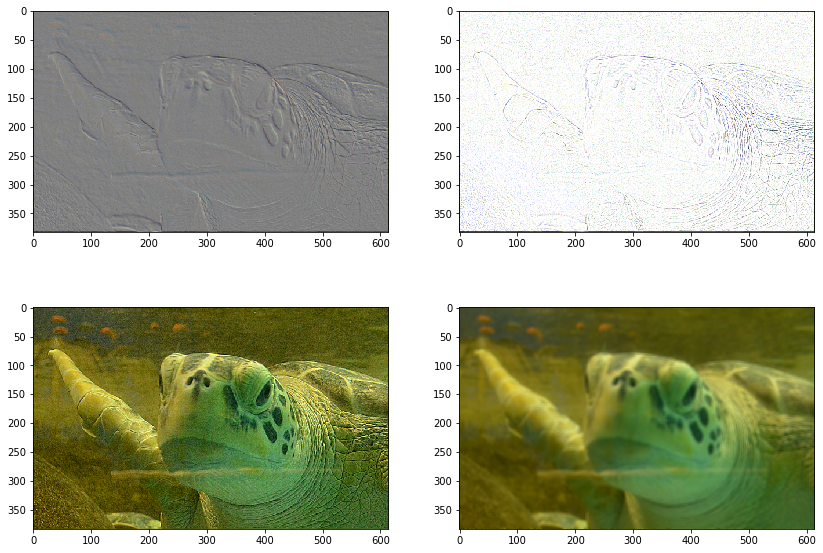

In [5]:
imgs =[img1,img2,img3,img4]

fig = plt.figure(figsize=(14,10))
for i,x in enumerate(imgs):
  ax = fig.add_subplot(2,2,i+1)
  ax.imshow(x)

In [6]:
import numpy as np

def conv(inputs, kernel):
  row,column =inputs.shape
  kr, kc  = kernel.shape
  outputs = np.zeros((3,3),inputs.dtype)
  for i in range(3):
    for j in range (3):
      patch= X[i:i+3,j:j+3]
      prod = patch * kernel
      sum =  np.sum(prod)
      outputs[i,j] = sum
  return outputs
    
X = np.arange(25,dtype=np.float32).reshape(5,5)
kernel = np.arange(9, dtype = np.float32).reshape(3,3)
conv(X,kernel)


array([[312., 348., 384.],
       [492., 528., 564.],
       [672., 708., 744.]], dtype=float32)

In [7]:
X = np.arange(25,dtype=np.float32).reshape(5,5)
X[0:3,0:3]

array([[ 0.,  1.,  2.],
       [ 5.,  6.,  7.],
       [10., 11., 12.]], dtype=float32)

In [0]:
kernel1 = ((np.arange(9).reshape(3,3)==7)).astype(np.float32)

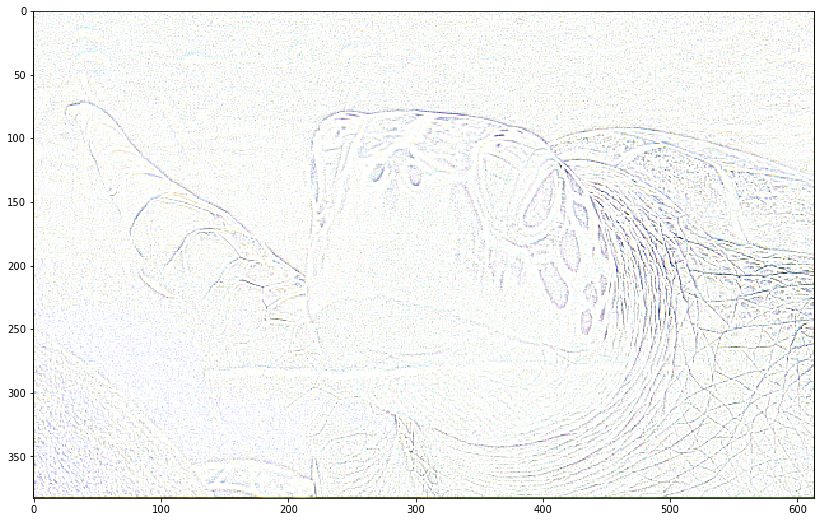

In [9]:
with Image.open('002.png') as img:

    img =img.filter(ImageFilter.Kernel(size=(3,3),kernel=(-1,-1,-1,-1,8,-1,-1,-1,-1),scale=1,offset=255))

    fig = plt.figure(figsize=(14,14))
    ax = fig.gca()
    ax.imshow(img)

In [10]:
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
img = tf.io.decode_jpeg(tf.io.read_file('002.png'))

In [12]:
print(img.shape)

(383, 614, 3)


In [0]:
img = tf.expand_dims(img,axis=0)


In [14]:
print(img.shape)

(1, 383, 614, 3)


In [15]:
kernel = []
kernel = np.array([-1,-1,-1,-1,10,-1,-1,-1,-1]).reshape(3,3,1,1)

kernel = kernel * 0.5

kernel = kernel.astype(np.float32)
print(kernel.shape)
print(kernel)

(3, 3, 1, 1)
[[[[-0.5]]

  [[-0.5]]

  [[-0.5]]]


 [[[-0.5]]

  [[ 5. ]]

  [[-0.5]]]


 [[[-0.5]]

  [[-0.5]]

  [[-0.5]]]]


In [16]:
float_img = tf.cast(img,tf.float32)/255.0
float_img[:,:,:,1]

<tf.Tensor: shape=(1, 383, 614), dtype=float32, numpy=
array([[[0.29411766, 0.29411766, 0.29803923, ..., 0.33333334,
         0.33333334, 0.33333334],
        [0.2901961 , 0.29803923, 0.29803923, ..., 0.3372549 ,
         0.3254902 , 0.32941177],
        [0.28627452, 0.28627452, 0.29411766, ..., 0.3372549 ,
         0.3372549 , 0.3254902 ],
        ...,
        [0.23137255, 0.23137255, 0.25490198, ..., 0.36862746,
         0.38039216, 0.38431373],
        [0.23529412, 0.23529412, 0.24313726, ..., 0.3647059 ,
         0.3647059 , 0.3882353 ],
        [0.24313726, 0.26666668, 0.25882354, ..., 0.38431373,
         0.3647059 , 0.4117647 ]]], dtype=float32)>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


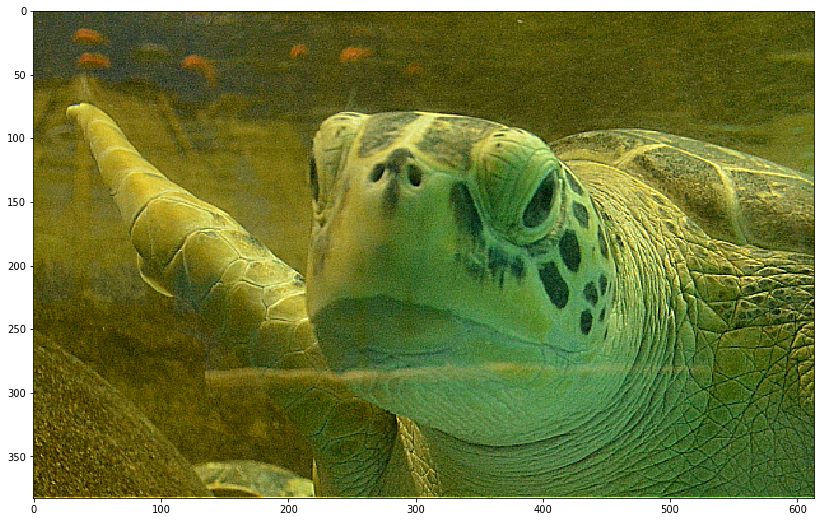

In [25]:
kernel = []
kernel = np.array([-1,-1,-1,-1,10,-1,-1,-1,-1]).reshape(3,3,1,1)
kernel = 0.5 * kernel.astype(np.float32)


outputs = []
float_img = tf.cast(img,tf.float32)/255.0
for i in range(3):
  conv_result = tf.nn.conv2d(float_img[:,:,:,i:i+1],kernel,1,'SAME')
  outputs.append(conv_result)
outputs = tf.concat(outputs, axis = -1)

fig = plt.figure(figsize=(14,14))
ax = fig.gca()
ax.imshow(outputs[0].numpy())


In [0]:
emboss_kernel =[]
emboss_kernel = np.array([-1,0,0,0,1,0,0,0,0]).reshape(3,3,1,1)

In [0]:
emboss_kernel = np.broadcast_to(emboss_kernel,(3,3,3,1))

In [20]:
emboss_kernel=emboss_kernel.astype(np.float32)
print(emboss_kernel.shape)
print(emboss_kernel)

(3, 3, 3, 1)
[[[[-1.]
   [-1.]
   [-1.]]

  [[ 0.]
   [ 0.]
   [ 0.]]

  [[ 0.]
   [ 0.]
   [ 0.]]]


 [[[ 0.]
   [ 0.]
   [ 0.]]

  [[ 1.]
   [ 1.]
   [ 1.]]

  [[ 0.]
   [ 0.]
   [ 0.]]]


 [[[ 0.]
   [ 0.]
   [ 0.]]

  [[ 0.]
   [ 0.]
   [ 0.]]

  [[ 0.]
   [ 0.]
   [ 0.]]]]


In [21]:
float_img.shape

TensorShape([1, 383, 614, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


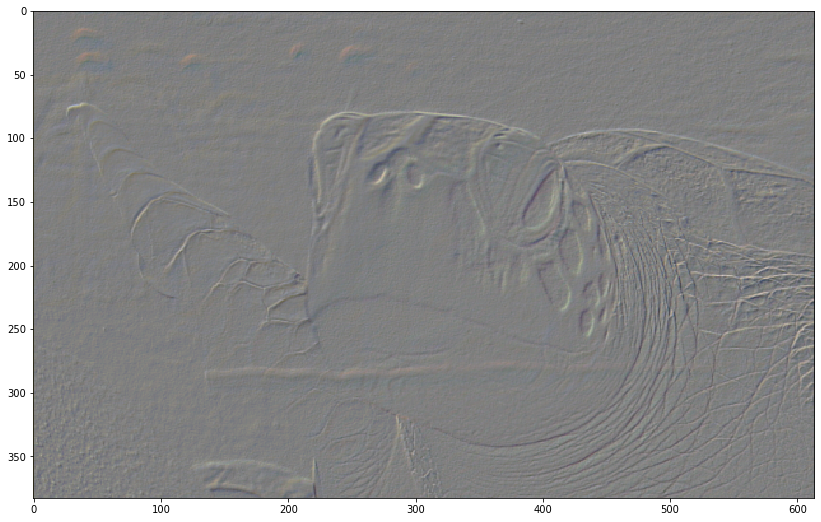

In [22]:
outputs =[]
outputs = tf.nn.depthwise_conv2d(float_img, emboss_kernel, strides=[1,1,1,1],padding='SAME')
outputs = 0.5 + outputs

fig = plt.figure(figsize=(14,14))
ax = fig.gca()
ax.imshow(outputs[0].numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


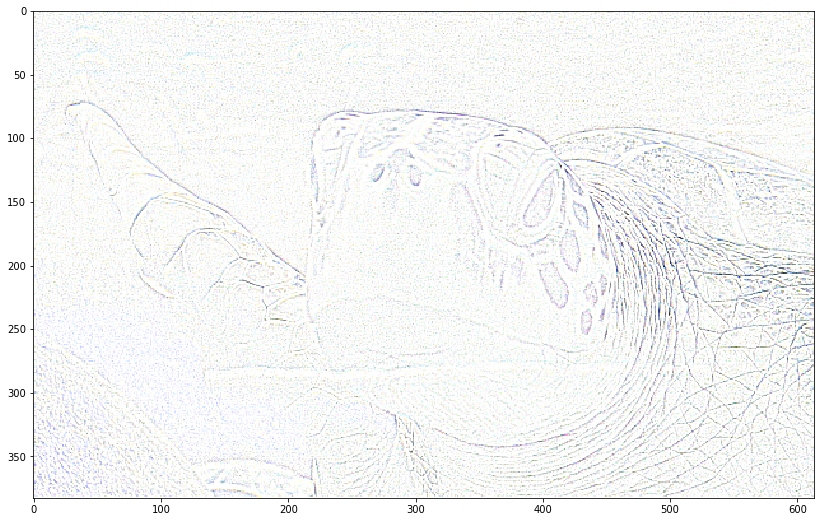

In [23]:
contour_kernel = np.array([-1,-1,-1,-1,8,-1,-1,-1,-1]).reshape(3,3,1,1).astype(np.float32)
contour_kernel = np.broadcast_to(contour_kernel,(3,3,3,3))
mask = np.eye(3).reshape(1,1,3,3).astype(np.float32)
contour_kernel=contour_kernel * mask
outputs=tf.nn.conv2d(float_img,contour_kernel,1,padding='SAME')
outputs += 1
fig = plt.figure(figsize=(14,14))
ax = fig.gca()
ax.imshow(outputs[0].numpy())
